In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [121]:
eyeL = Image.open('/home/tyrrell/Pictures/ismo/eye1.jpg')
eyeR = Image.open('/home/tyrrell/Pictures/ismo/eye1.png')
pixrawR = np.array(eyeR.getdata()).copy()
pixrawL = np.array(eyeL.getdata()).copy()
print(pixrawR.shape)
print(pixrawL.shape)
print(pixrawL)
print(pixrawR)

(1558656, 4)
(1558656, 3)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[187 163 159   0]
 [184 160 156   0]
 [180 156 152   0]
 ...
 [171 157 157   0]
 [170 156 156   0]
 [167 153 153   0]]


In [122]:
pixrawL.max()

134

Text(0.5, 1.0, 'Left eye')

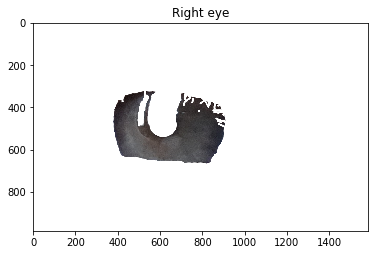

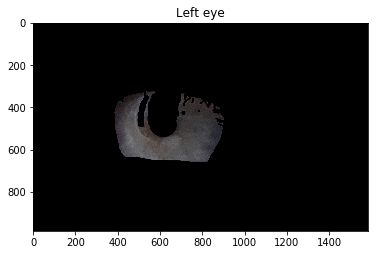

In [123]:
plt.figure()
plt.imshow(eyeR)
plt.title("Right eye")
plt.figure()
plt.imshow(eyeL)
plt.title("Left eye")

## Filter out blank pixels, combine eyes, sort

In [124]:
#pixR = pixrawR #[pixrawR[:,3]==255][:,:]
pixL = pixrawL[np.all(pixrawL[:,:]>4,axis=1)]
#pixL.sort(axis=0)
pixR = pixrawR[pixrawR[:,3]>200]
#pixR.sort(axis=0)

#pixR = pixrawR[np.all(pixrawR[:,:]>4,axis=1)]
#pixR.sort(axis=0)

#b = a[np.all(a[:,:3] < 0,axis=1)]
#both = np.concatenate([pixR,pixL])/255

#print(both.shape)
#print(pixR.shape)
print(pixL.shape)
print(pixR.shape)
upixL =  np.unique(pixL,axis=0)
print(upixL)
print(upixL.shape)
upixR =  np.unique(pixR,axis=0)
print(upixR)
print(upixR.shape)



(111454, 3)
(115383, 4)
[[  5   5   5]
 [  5   5   7]
 [  5   6   8]
 ...
 [126 126 128]
 [130 131 133]
 [131 132 134]]
(5130, 3)
[[ 20  10   9 255]
 [ 21  11  10 255]
 [ 21  13  11 255]
 ...
 [163 161 162 255]
 [164 160 161 255]
 [168 168 168 255]]
(6850, 4)


In [125]:
#pixL[-90::,:]

In [139]:
newupixR = upixR[::]
newupixR.shape

(6850, 4)

(1712, 6850, 4)


(-0.5, 6849.5, 1711.5, -0.5)

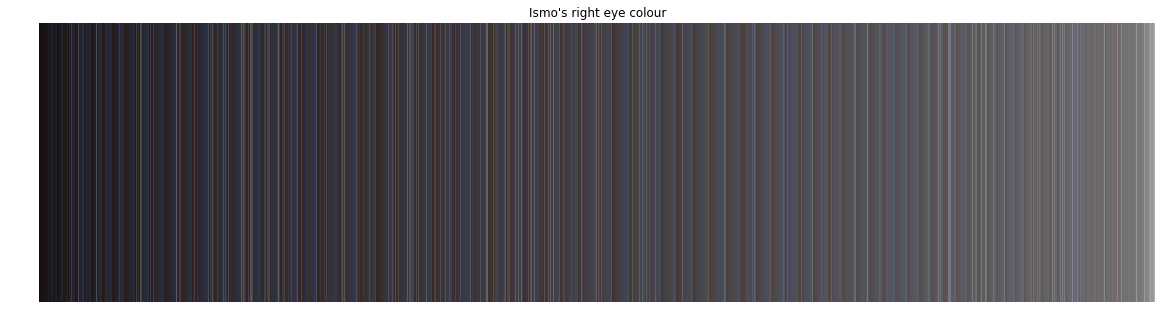

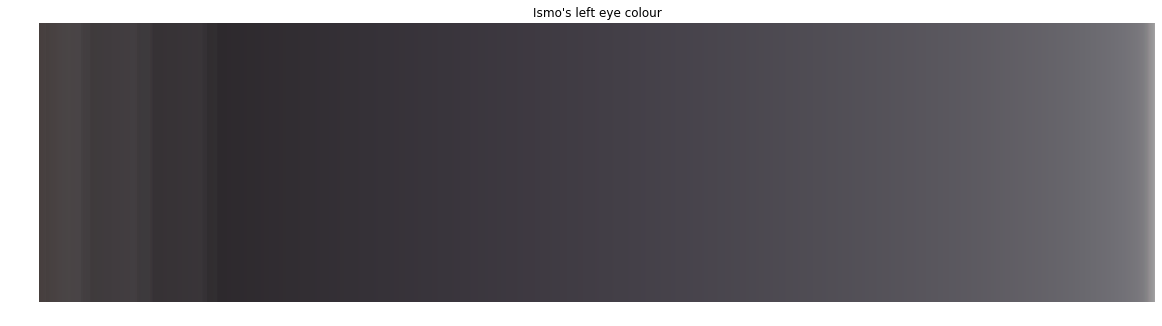

In [140]:

#pixwideR = np.broadcast_to(both,(int(both.shape[0]/3),both.shape[0],3))

colsR = 4
brarrR = newupixR.copy()
pixwideR = np.broadcast_to(brarrR,(int(brarrR.shape[0]/colsR),brarrR.shape[0],colsR)).copy()
colsL = 4
sortR = newupixR.copy()
sortR.sort(axis=0)
brarrL = sortR
pixwideL = np.broadcast_to(brarrL,(int(brarrL.shape[0]/colsL),brarrL.shape[0],colsL)).copy()

#sortR.argsort(axis=1)
#a[a[:,1].argsort()]
print(pixwideR.shape)
#tup = [tuple(x) for x in short]
#
#print(tup)
plt.figure(figsize=(20,10))
plt.imshow(pixwideR)
plt.title("Ismo's right eye colour")
plt.axis("off")

plt.figure(figsize=(20,10))
plt.imshow(pixwideL)
plt.title("Ismo's left eye colour")
plt.axis("off")

#plt.savefig("/home/tyrrell/Pictures/ismo/eye_colour.png")
